<a href="https://colab.research.google.com/github/steve-burman/machine-learning-intro/blob/master/TensorFlow_SXB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Demo
Steve Burman
303-249-1177

Python welcome message:

check installation:

In [0]:
message = "Welcome to Steve's TensorFlow Demo space"
print( message )

Welcome to Steve's TensorFlow Demo space


# Linear Regression
best fit using objective function:  y = m * x + b

In [30]:
import  matplotlib.pyplot  as plt

%tensorflow_version  2.x
import  tensorflow  as  tf
print( tf.__version__ )

from  tensorflow.keras  import Model

def  createSimulatedData( m=0.1, b=0.3, n=100, stddev=0.1 ):
  x = tf.random.uniform( shape=( n, ) )
  noise = tf.random.normal( shape=( len(x), ), stddev=stddev )
  y = m * x + b + noise
  return x, y

def calculateLineSlope(x1, y1, x2, y2):
  dx = x2 - x1
  dy = y2 - y1
  m = dy / dx
  return m

2.1.0-rc1


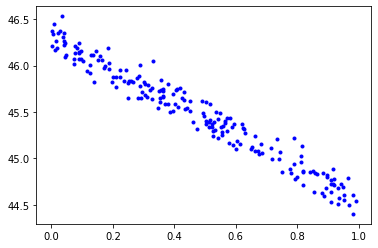

In [31]:
m = calculateLineSlope( 6.9528, 46.3015, 7.0458, 46.1395 )
x_train, y_train = createSimulatedData( m, 46.3015, 200 )
plt.plot( x_train, y_train, 'b.' )